In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install --upgrade --force-reinstall git+https://github.com/FelipeSchreiber/BregmanClustering.git --no-deps
# !apt-get install vtk6
# !apt-get install libvtk6-dev python-vtk6
# !pip install -U PyQt5
# !pip install -q mayavi
# !pip install virtualenv
!pip install torch_geometric rpy2==3.5.1
### Comment line below if in Google Colab environment
import os
import pickle
from sys import platform
import BregmanTests
os.chmod(BregmanTests.__path__[0]+"/install_algos.sh",777)
if platform == "win32":
    os.environ["R_HOME"] = r"C:\\Program Files\R\R-4.2.3"
else:
    ### Uncomment line below if in Google Colab environment
    print(os.path.isfile(BregmanTests.__path__[0]+"/install_algos.sh"))
    ### Done

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/FelipeSchreiber/BregmanClustering.git to /tmp/pip-req-build-eco_g4kv
  Running command git clone --filter=blob:none --quiet https://github.com/FelipeSchreiber/BregmanClustering.git /tmp/pip-req-build-eco_g4kv
  Resolved https://github.com/FelipeSchreiber/BregmanClustering.git to commit f832496b3625b815fb25a4d8fdb60e5329f5a17a
  Preparing metadata (setup.py) ... done
  Created wheel for bregClust: filename=bregClust-1.0-py3-none-any.whl size=29821 sha256=08e29136f0f3e431ec655c2a467aa03a3b77e9219f706398123ca52c8864001d
  Stored in directory: /tmp/pip-ephem-wheel-cache-d34e8djt/wheels/3f/90/fb/833529540c1d5f19c385fde761cc07c664c4b9a5edf7c6735b
Successfully built bregClust
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 13.0 MB/s eta 0:00:00
  Installing b

In [3]:
from BregmanTests.benchmark import *
n_average = 1
n = 300
n_clusters = 3
d = 1
sizes = [ n // n_clusters ]*np.ones( n_clusters, dtype = int )


Accessing /usr/local/lib/python3.10/dist-packages/BregmanTests/install_algos.sh
Installing R packages...
 This step takes about 5 min...



(as ‘lib’ is unspecified)







































	‘/tmp/Rtmp4uv5DV/downloaded_packages’



In [ ]:
attributes_distribution = "gaussian"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
a_range = np.linspace(5,14,20)
r_range = np.linspace(0,0.7,20)*np.log(n)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_gpu=True)\
                  .run_2_1(n_average=10,
                            cluster_sizes=sizes,
                            b=5,
                            a_range=a_range,
                            r_range = r_range,
                            dense=False,
                            plot_3d=False,
                            binary=True)
with open('test_2_1.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_1.pickle" "/content/drive/MyDrive"

In [ ]:
attributes_distribution = "poisson"
edge_distribution = "bernoulli"
weight_distribution = "gaussian"
d_range = np.arange(1,6)
mu_range = np.linspace(0,6,20)
att_centers = np.arange(1,4).reshape(-1,1)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    att_centers=att_centers,
                    run_gpu=True
                  )\
                  .run_2_2(n_average=10,
                            cluster_sizes=sizes,
                             d_range = d_range,
                             mu_range = mu_range,
                             dense=True,
                             binary=False)
with open('test_2_2.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_2.pickle" "/content/drive/MyDrive"

In [ ]:
attributes_distribution = "poisson"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
d_range = np.arange(1,5)
a_range = np.linspace(5,14,10)
lambda_range = np.arange(1,6)
att_centers = np.arange(1,4).reshape(-1,1)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    att_centers=att_centers,
                    run_gpu=True
                 )\
                  .run_2_3(n_average=10,
                            cluster_sizes=sizes,
                            d_range= d_range,
                            lambda_range = lambda_range,
                            a_range = a_range,
                            b = 5,
                            dense=False,
                            binary=False)
with open('test_2_3.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_3.pickle" "/content/drive/MyDrive"

In [ ]:
attributes_distribution = "bernoulli"
edge_distribution = "bernoulli"
weight_distribution = "gaussian"
scores = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_gpu=True)\
                  .run_real_data()
scores

Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!


Initialisation chosen from the attributes


In [4]:
from BregmanTests.utils import *

In [5]:
test_2_1=None
with open("/content/drive/MyDrive/test_2_1.pickle", 'rb') as handle:
    test_2_1 = pickle.load(handle)
test_2_1.keys()

dict_keys(['a', 'r', 'ARI'])

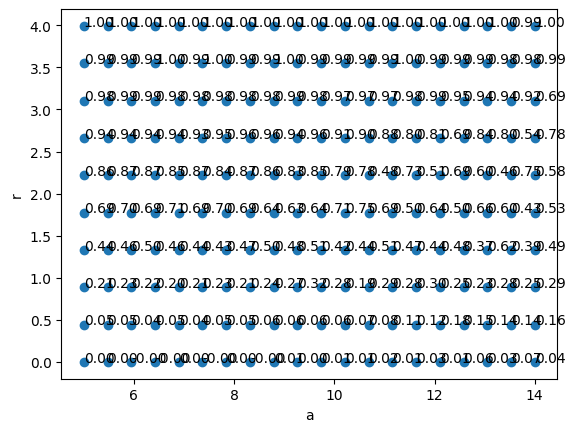

In [9]:
def scatter_(dict_,x_name,y_name,z_name):
  fig, ax = plt.subplots()
  x,y = dict_[x_name],dict_[y_name]
  ax.scatter(x,y)
  for i, txt in enumerate(dict_[z_name]):
      ax.annotate("{:.2f}".format(txt), (x[i], y[i]))
  ax.set_xlabel(x_name)
  ax.set_ylabel(y_name)
scatter_(test_2_1,'a', 'r', 'ARI')

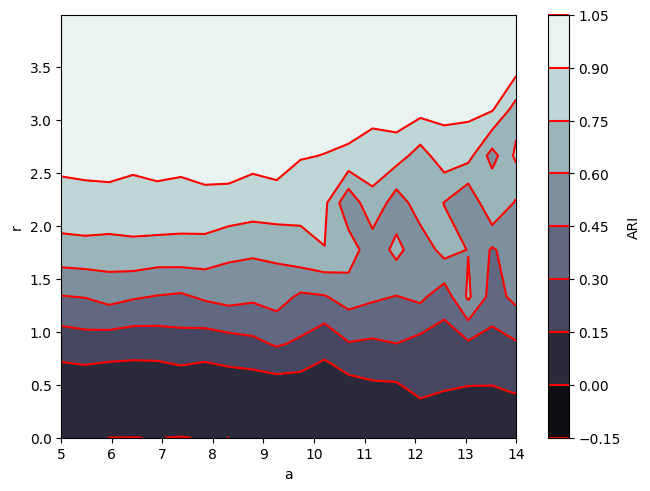

In [6]:
x,y,z = test_2_1["a"],test_2_1["r"],test_2_1["ARI"]
vals_x = np.unique(x)
vals_y = np.unique(y)
"""
len(X) == N is the number of columns in Z and len(Y) == M is the number of rows in Z.
Z = M x N
"""
x = np.array(x).reshape(vals_x.shape[0],vals_y.shape[0])
y = np.array(y).reshape(vals_x.shape[0],vals_y.shape[0])
z = np.array(z).reshape(vals_x.shape[0],vals_y.shape[0]).T
make_contour_plot(vals_x,vals_y,z,x_label="a",y_label="r",filename="contour_plot_2_1.jpeg",plot_3d=False)

In [7]:
test_2_2=None
with open("/content/drive/MyDrive/test_2_2.pickle", 'rb') as handle:
    test_2_2 = pickle.load(handle)
test_2_2.keys()

dict_keys(['d', 'mu', 'ARI'])

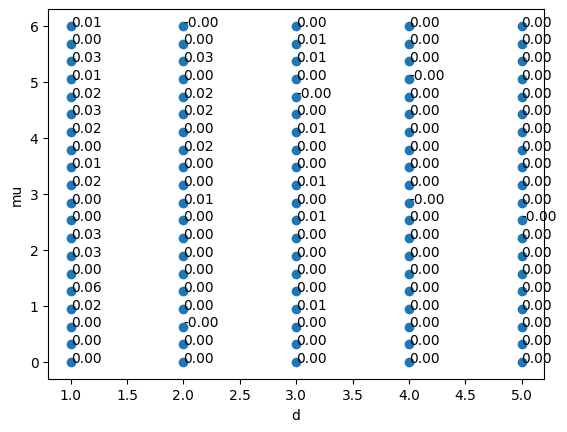

In [10]:
scatter_(test_2_2,'d', 'mu', 'ARI')

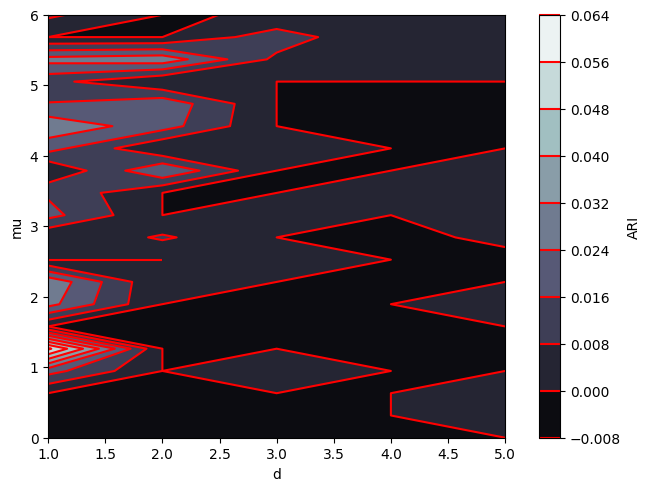

In [11]:
x,y,z = test_2_2["d"],test_2_2["mu"],test_2_2["ARI"]
vals_x = np.unique(x)
vals_y = np.unique(y)
"""
len(X) == N is the number of columns in Z and len(Y) == M is the number of rows in Z.
Z = M x N
"""
x = np.array(x).reshape(vals_x.shape[0],vals_y.shape[0])
y = np.array(y).reshape(vals_x.shape[0],vals_y.shape[0])
# x,y = np.meshgrid(vals_x,vals_y)
z = np.array(z).reshape(len(vals_x),len(vals_y)).T
make_contour_plot(vals_x,vals_y,z,x_label="d",y_label="mu",filename="contour_plot_2_2.jpeg",plot_3d=False)

In [12]:
test_2_3=None
with open("/content/drive/MyDrive/test_2_3.pickle", 'rb') as handle:
    test_2_3 = pickle.load(handle)
test_2_3.keys()

dict_keys(['d', 'lambda', 'a', 'ARI'])

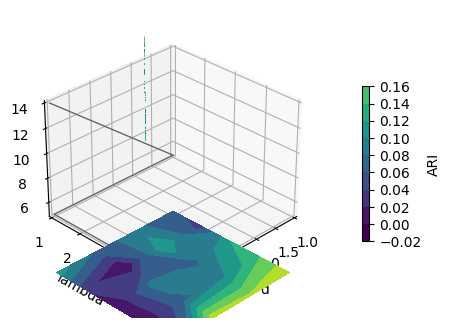

In [14]:
x,y,z,data = test_2_3["d"],test_2_3["lambda"], test_2_3["a"],test_2_3["ARI"]
vals_x = np.unique(x)
vals_y = np.unique(y)
vals_z = np.unique(z)
"""
len(X) == N is the number of columns in data,
len(Y) == M is the number of rows in data.
len(Z) == P is the depth of data
DATA = M x N X P
"""
X = np.array(x).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
Y = np.array(y).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
Z = np.array(z).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
data = np.array(data).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])

x_label="d"
y_label="lambda"
z_label = "a"
kw = {
        'vmin': data.min(),
        'vmax': data.max()
    }

# Create a figure with 3D ax
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')

# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot contour surfaces
_ = ax.contourf(
        X[:, :, 0], Y[:, :, 0], data[:, :, 0],
        zdir='z', offset=0, **kw
    )
### This is the top of the box

    # _ = ax.contourf(
    #     X[:, :, -1], Y[:, :, -1], data[:, :, -1],
    #     zdir='z', offset=Z.max(), **kw
    # )
_ = ax.contourf(
        X[0, :, :], data[0, :, :], Z[0, :, :],
        zdir='y', offset=0, **kw
    )

C = ax.contourf(
        data[:, 0, :], Y[:, 0, :], Z[:, 0, :],
        zdir='x', offset=X.min(), **kw
    )
    # --

    # Plot edges
edges_kw = dict(color='0.4', linewidth=1,zorder=-1e3)
ax.plot([xmax, xmax], [ymin, ymax], zmin, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], zmin, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# Set labels and zticks
ax.set(
        xlabel=x_label,
        ylabel=y_label,
        zlabel=z_label
    )

# Set zoom and angle view
ax.view_init(30, 45, 0)
ax.set_box_aspect(None, zoom=0.9)

# Colorbar
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='ARI')